# Latent Semantic Analysis - Text Mining Module 
### Prof. Gianluca Moro - DISI - University of Bologna, Cesena, Campus
### Via dell'Università 50 - 47522 Cesena (FC)
#### name.surname@unibo.it

In [ ]:
# installation and importing of LSA package 
install.packages("lsa")
library(lsa) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# intial terms-docs matrix 
tdm_ship_boat = matrix(c(1,0,1,0,0,0,  
                         0,1,0,0,0,0,  
                         1,1,0,0,0,0, 
                         1,0,0,1,1,0, 
                         0,0,0,1,0,1), 
                       nrow=5, ncol=6, byrow = TRUE, 
                       dimnames = list(c("ship", "boat", "ocean", "wood", "tree"), 
                                       c("d1", "d2", "d3","d4","d5","d6")))
tdm_ship_boat

,d1,d2,d3,d4,d5,d6
ship,1,0,1,0,0,0
boat,0,1,0,0,0,0
ocean,1,1,0,0,0,0
wood,1,0,0,1,1,0
tree,0,0,0,1,0,1


In [ ]:
# creation of the LSA space from tdm_ship_boat by setting the reduced rank to 2:
# it generates the 3 matrix according to SVD: U Σ V^t 
# terms are in tk, i.e. U, eigenvalues are in sk i.e. Σ, docs are in dk, i.e. V^t
tdm_ship_boat_lsa = lsa(tdm_ship_boat, 2)

tdm_ship_boat_lsa$tk
tdm_ship_boat_lsa$sk
diag(tdm_ship_boat_lsa$sk)
tdm_ship_boat_lsa$dk
t(tdm_ship_boat_lsa$dk)

ship,0.4403475,-0.2961744
boat,0.1293463,-0.3314507
ocean,0.4755303,-0.5111152
wood,0.7030203,0.3505724
tree,0.2626728,0.6467468


[1] 2.162501 1.594382

2.162501,0.000000
0.000000,1.594382


d1,0.7486230,-0.2864540
d2,0.2797116,-0.5284591
d3,0.2036288,-0.1857612
d4,0.4465631,0.6255207
d5,0.3250960,0.2198798
d6,0.1214672,0.4056409


d1,d2,d3,d4,d5,d6
0.748623,0.2797116,0.2036288,0.4465631,0.3250960,0.1214672
-0.286454,-0.5284591,-0.1857612,0.6255207,0.2198798,0.4056409


In [ ]:
class(tdm_ship_boat_lsa)

[1] "LSAspace"

In [ ]:
# terms matrix tk weighted by the eigenvalues sk in order to correctly place 
# them in the graphs with terms and docs; %*% is the canonical matrix product 
tdm_ship_boat_lsa_terms = tdm_ship_boat_lsa$tk %*% diag(tdm_ship_boat_lsa$sk)
tdm_ship_boat_lsa_terms

ship,0.9522518,-0.4722152
boat,0.2797116,-0.5284591
ocean,1.0283347,-0.8149131
wood,1.5202821,0.5589465
tree,0.5680303,1.0311616


In [ ]:
# docs matrix dk weighted by the eigenvalues sk in order to correctly place 
# them in the graphs with terms and docs
tdm_ship_boat_lsa_docs = tdm_ship_boat_lsa$dk %*% diag(tdm_ship_boat_lsa$sk)
tdm_ship_boat_lsa_docs

d1,1.6188981,-0.4567172
d2,0.6048766,-0.8425659
d3,0.4403475,-0.2961744
d4,0.9656932,0.9973192
d5,0.7030203,0.3505724
d6,0.2626728,0.6467468


In [ ]:
# this copies the terms in order to add their labels in the graph terms docs  
termNames_ship_boat = rownames(tdm_ship_boat)

# analogously this copies the docs labels to add them in the same graph
docsNames_ship_boat = colnames(tdm_ship_boat)

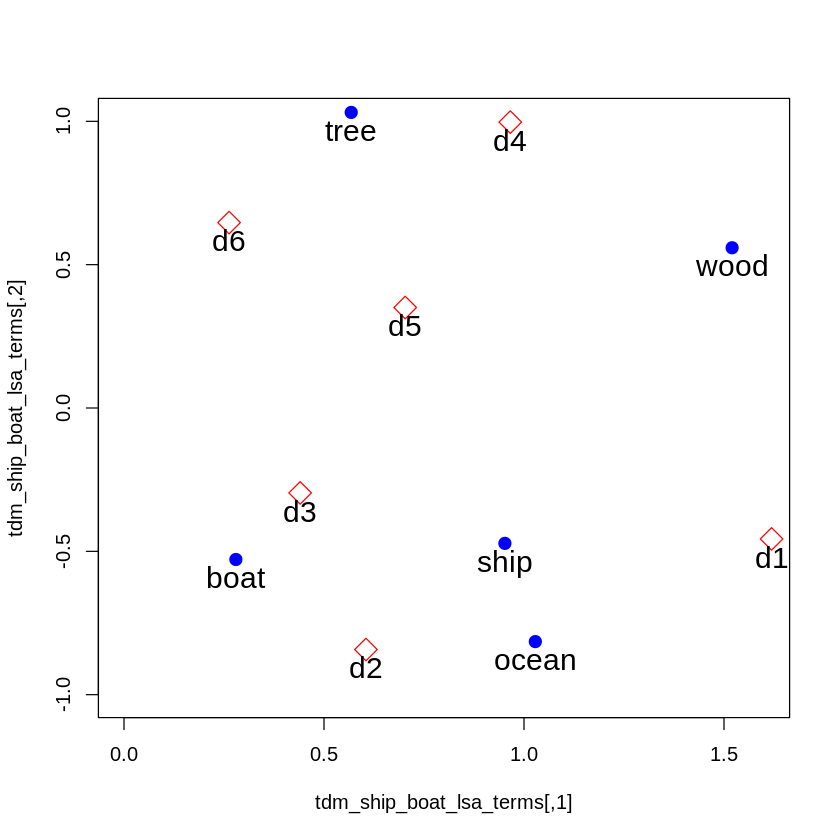

In [ ]:
# creation of the graphs with terms and docs; pch controls the shape of each point, 
# xlim and ylim set the axes intervals 

## uncomments the png() statement to save graph (changing in case the size) to a file
## png("lsa.png", width=800, height=700)
plot(tdm_ship_boat_lsa_terms, pch=20, cex=2, col="blue", xlim=c(0.0, 1.6), ylim=c(-1,1))

# this adds to the graph the terms, cex controls the font size, pos=1 controls the position 
# of the label with respect to its points, 1 means under the point
text(tdm_ship_boat_lsa_terms, labels=termNames_ship_boat, cex=1.5, pos=1)

# adds the docs to the graph each with a red symbol  
points(tdm_ship_boat_lsa_docs, pch=23, cex=2, col="red") 

# adds the names of the docs
text(tdm_ship_boat_lsa_docs, labels=docsNames_ship_boat, cex=1.5, pos=1)

## uncomments dev.off() in case you have uncommented the png() statement above to save the graph

In [ ]:
# Let's create our first QUERY with two terms "ship ocean" calling the onehot encoding 
# function query() to which we supply our vocabulary in the second input parameter
# according to the original matrix terms docs
q = query("ship ocean", rownames(tdm_ship_boat))
q

      SHIP OCEAN
ship           1
boat           0
ocean          1
wood           0
tree           0

In [ ]:
# this runs the query in the original terms docs matrix, namely without using the LSA space
# that is computing the cosine similarity between the query q and the doc d2: [,2] -> column 2
#     as.vector(q) is type conversion of q to a vector, the data type required by cosine() 
cosine(as.vector(q), as.vector(tdm_ship_boat[,2])) # returns 0.5

0.5


In [ ]:
# Now let's run the same query in the rebuilt terms docs matrix from the LSA space
# Attention: this matrix is no longer sparse and with large datasets 
# (tens of thousands of rows and cols in double precision can require almost 10 Gigabytes) 
tdm_ship_boat_ricostruita = as.textmatrix(tdm_ship_boat_lsa)
tdm_ship_boat_ricostruita

             d1         d2          d3          d4          d5          d6
ship  0.8481456  0.5159023  0.28162515  0.12986018  0.20574267 -0.07588249
boat  0.3607778  0.3575076  0.15512454 -0.20565325 -0.02526436 -0.18038889
ocean 1.0032701  0.7182854  0.36077778 -0.05052871  0.15512454 -0.20565325
wood  0.9780058  0.1298602  0.20574267  1.02853450  0.61713858  0.41139591
tree  0.1298602 -0.3860421 -0.07588249  0.89867432  0.41139591  0.48727840

In [ ]:
# fold-in the query q in the LSA space, that is the query is trasformed as illustrated 
# in the last lesson, simply here we use the fold_in() predefined function instead of
# directly using the formula presented in the lecture; 
# the query is executed over the rebuilt terms docs matrix 
ship_ocean = fold_in(q, tdm_ship_boat_lsa) # cosine() here returns 0.97 >> 0.5
cosine(as.vector(ship_ocean), as.vector(tdm_ship_boat_ricostruita[,2])) 

0.974639


In [ ]:
# Let's repeat the analysis within the LSA space, namely without rebuilding the large 
# dense terms docs matrix; we transform the query q in the doc q2 using the formula 
# explained in the last lesson namely (q2 = Σk^-1·U^T·q) 
# this makes q2 compliant with the dimension (shape) of V, i.e. dk  
q2 = diag(tdm_ship_boat_lsa$sk^-1) %*% t(tdm_ship_boat_lsa$tk) %*% q

# this is to correctly place q2 in the LSA graph (x,y)
t(q2) %*% diag(tdm_ship_boat_lsa$sk)

SHIP OCEAN,0.9158777,-0.8072896


In [ ]:
# extraction of the d2 doc vector from the LSA space (second row of the matrix dk)
d2 = tdm_ship_boat_lsa$dk[2,]

# to place the d2 in the LSA graph (weighting wrt to eigenvalues)
t(diag(tdm_ship_boat_lsa$sk) %*% d2)

0.6048766,-0.8425659


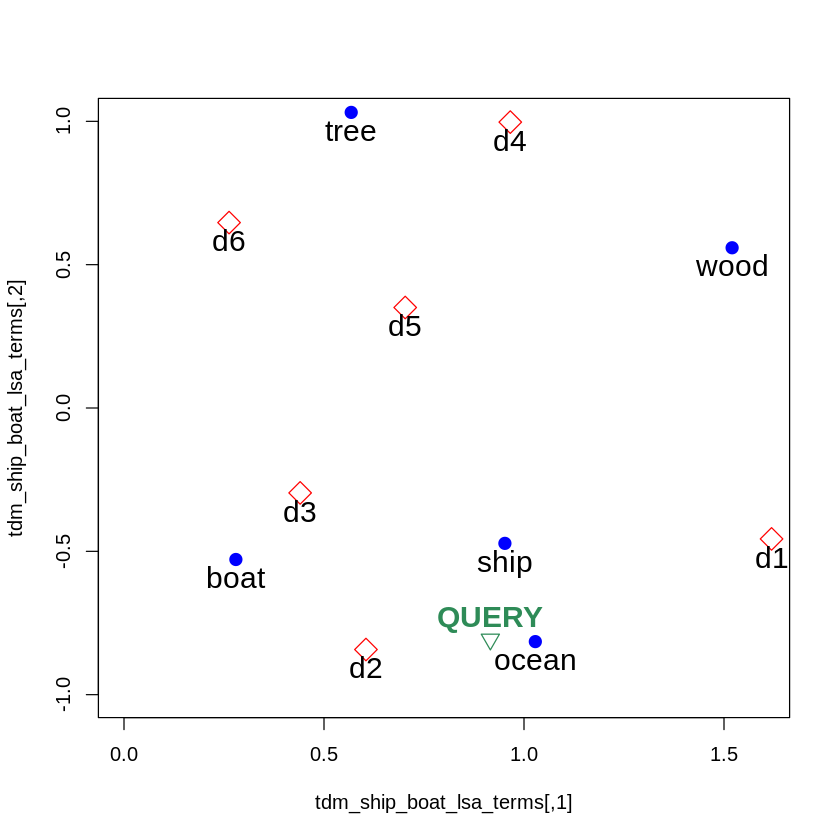

In [ ]:
# this diplays again the graph with the terms, docs but now with the query q2 with the label QEURY
# font=2 means bold

plot(tdm_ship_boat_lsa_terms, pch=20, cex=2, col="blue", xlim=c(0.0, 1.6), ylim=c(-1,1))

# this adds to the graph the terms, cex controls the font size, pos=1 controls the position 
# of the label with respect to its points, 1 means under the point
text(tdm_ship_boat_lsa_terms, labels=termNames_ship_boat, cex=1.5, pos=1)
points(tdm_ship_boat_lsa_docs, pch=23, cex=2, col="red") # aggiunge le posiz. dei doc 

# add the docs labels 
text(tdm_ship_boat_lsa_docs, labels=docsNames_ship_boat, cex=1.5, pos=1)


# this places the query in the graph
points(t(q2) %*% diag(tdm_ship_boat_lsa$sk), pch=25, col="seagreen", cex=1.5) # col="seagreen"       
text(t(q2) %*% diag(tdm_ship_boat_lsa$sk),labels="QUERY", font=2, cex=1.5, pos=3, col="seagreen")

In [ ]:
# Computing the cosine similarity between q and d2 with LSA using the formula
# explained in the last lesson: cos(q_2·Σ_2, d_2·Σ_2) instead of using 
# fold_in() - we get exactly the same results 0.974639
cosine(as.vector(t(q2) %*% diag(tdm_ship_boat_lsa$sk)), 
       as.vector(d2 %*% diag(tdm_ship_boat_lsa$sk)))

0.974639


In [ ]:
# Returs the similar terms to "boat" in descendant order of similarity
# with minimum cosine threshold 0.5: we get -> ocean 0.91, ship 0.81 even if no documents 
# contains both terms boat e ship
associate(tdm_ship_boat_lsa_terms, "boat", threshold = 0.5)

ocean      ship 
0.9155749 0.8117637

In [ ]:
# In the original terms docs matrix the same statement returns only 
# ocean with 0.71
associate(tdm_ship_boat, "boat", threshold = 0.5) 

ocean 
0.7071068

In [ ]:
# Now let's search for terms similar to "tree" in the LSA space, we get -> wood 0.75, 
associate(tdm_ship_boat_lsa_terms, "tree", threshold = 0.5)

# # but no result in the original matrix
associate(tdm_ship_boat, "tree", threshold = 0.4) # we should lower the threshold

wood 
0.755113

wood 
0.4082483

## Esercise 1: Finding the most relevant docs for the query "tree wood" without rebuilding the terms docs matrix from the lsa space 

In [ ]:
# onehot encoding of the query
q_wood_tree = query("wood tree", rownames(tdm_ship_boat))

In [ ]:
# porting of the query in the LSA space as a doc according to the formula explained in the preceding lesson
# Attention: we are applying, not changing, the pre-computed LSA model.
q3 = diag(tdm_ship_boat_lsa$sk^-1) %*% t(tdm_ship_boat_lsa$tk) %*% q_wood_tree

In [ ]:
# extraction of the document d4 from the LSA space 
d4 = tdm_ship_boat_lsa$dk[4,]

In [ ]:
# cosine similarity between due doc, q3 and d4, within the LSA space
cosine(as.vector(t(q3) %*% diag(tdm_ship_boat_lsa$sk)), 
       as.vector(d4 %*% diag(tdm_ship_boat_lsa$sk)))

1


In [ ]:
# idem with d5 and the other docs
d5 = tdm_ship_boat_lsa$dk[5,]
cosine(as.vector(t(q3) %*% diag(tdm_ship_boat_lsa$sk)), 
       as.vector(d5 %*% diag(tdm_ship_boat_lsa$sk)))

0.9431117


In [ ]:
d6 = tdm_ship_boat_lsa$dk[6,]
cosine(as.vector(t(q3) %*% diag(tdm_ship_boat_lsa$sk)), 
       as.vector(d6 %*% diag(tdm_ship_boat_lsa$sk)))

0.9273621


In [ ]:
d3 = tdm_ship_boat_lsa$dk[3,]
cosine(as.vector(t(q3) %*% diag(tdm_ship_boat_lsa$sk)), 
       as.vector(d3 %*% diag(tdm_ship_boat_lsa$sk)))

0.176269


In [ ]:
d2 = tdm_ship_boat_lsa$dk[2,]
cosine(as.vector(t(q3) %*% diag(tdm_ship_boat_lsa$sk)), 
       as.vector(d2 %*% diag(tdm_ship_boat_lsa$sk)))

-0.177918


In [ ]:
d1 = tdm_ship_boat_lsa$dk[1,]
cosine(as.vector(t(q3) %*% diag(tdm_ship_boat_lsa$sk)), 
       as.vector(d1 %*% diag(tdm_ship_boat_lsa$sk)))

0.474432


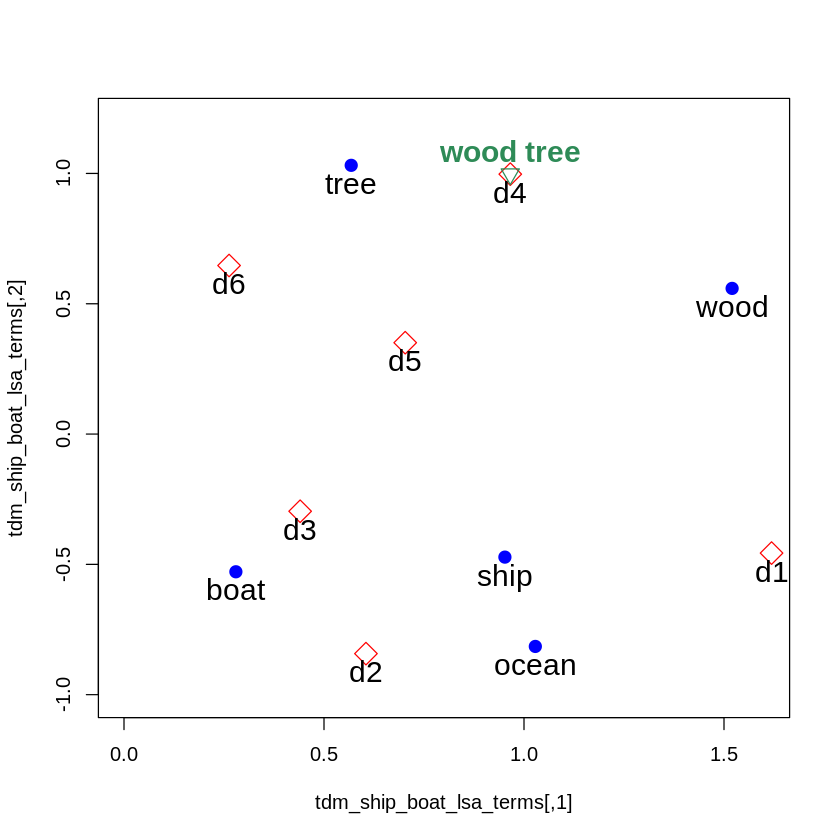

In [ ]:
# Displaying of the graph with the position of the new query q3 using the same code above

plot(tdm_ship_boat_lsa_terms, pch=20, cex=2, col="blue", xlim=c(0.0, 1.6), ylim=c(-1, 1.2))

# add the terms' names to the graph, cex is the font dimension, pos=1 positions the label under its point 
text(tdm_ship_boat_lsa_terms, labels=termNames_ship_boat, cex=1.5, pos=1)
points(tdm_ship_boat_lsa_docs, pch=23, cex=2, col="red") # aggiunge le posiz. dei doc 

# add the docs names to the graph
text(tdm_ship_boat_lsa_docs, labels=docsNames_ship_boat, cex=1.5, pos=1)


# put the query in the graph
points(t(q3) %*% diag(tdm_ship_boat_lsa$sk), pch=25, col="seagreen", cex=1.5) # col="seagreen"       
text(t(q3) %*% diag(tdm_ship_boat_lsa$sk),labels="wood tree", font=2, cex=1.5,pos=3, col="seagreen")

In [ ]:
# The same exercise resolved simply using the for iteration   
for(j in 1:6) {
  dd = tdm_ship_boat_lsa$dk[j,]
  coseno = cosine(as.vector(t(q3) %*% diag(tdm_ship_boat_lsa$sk)), as.vector(dd %*% diag(tdm_ship_boat_lsa$sk)))
  cat(coseno,"\n") 
} 

0.474432 
-0.177918 
0.176269 
1 
0.9431117 
0.9273621 


## Exercise 2: like exercise 1 but rebuilding the matrix terms-docs from the lsa space


## Exercise 3: Recomputing the most relevant docs for the same query without using LSA


## Exercise 4: like Exercise 2 but using the for iteration


## Exercise 5: resolving the exercise 1 by using only the predefined LSA functions fold_in() and sssociate() 

